In [1]:
#ASSIGNMENT 2

In [2]:
#1. Load library & dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

In [3]:
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)
data_weather = pd.read_csv('weather.csv', encoding= 'unicode_escape')

#1. DATA CLEANING

In [4]:
#1.1 data_price_demand

In [5]:
display(data_price_demand.head())

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [6]:
print(data_price_demand.dtypes)

0     object
1     object
2    float64
3    float64
4     object
dtype: object


In [7]:
# Add header name to the dataframe:
header_names = ['State', 'Date_Time', 'Demand', 'Price', 'Type']
data_price_demand.columns = header_names

In [8]:
# Convert the date column to a datetime data type
data_price_demand['Date_Time'] = pd.to_datetime(data_price_demand['Date_Time'], format='%d/%m/%Y %H:%M')

In [9]:
# Re-examine datatype:
print(data_price_demand.dtypes)

State                object
Date_Time    datetime64[ns]
Demand              float64
Price               float64
Type                 object
dtype: object


In [10]:
# Check for missing value
print(data_price_demand.isnull().sum())

State        0
Date_Time    0
Demand       0
Price        0
Type         0
dtype: int64


In [11]:
# Unique values in each columns:
for column in data_price_demand.columns:
    unique_values = data_price_demand[column].unique()
    print(f"'{column}': {unique_values}")

'State': ['VIC1']
'Date_Time': ['2022-11-01T00:30:00.000000000' '2022-11-01T01:00:00.000000000'
 '2022-11-01T01:30:00.000000000' ... '2023-04-23T23:00:00.000000000'
 '2023-04-23T23:30:00.000000000' '2023-04-24T00:00:00.000000000']
'Demand': [4178.18 4086.02 4033.37 ... 4472.49 4621.36 4395.96]
'Price': [8.940e+00 1.400e-01 2.000e-02 ... 8.125e+01 9.397e+01 8.396e+01]
'Type': ['TRADE']


In [12]:
#All states are VICTORIA in TRADE type.
#Calculate total demand for each day:
data_price_demand['Date'] = data_price_demand['Date_Time'].dt.date # Extract only the date from the datetime

In [13]:
print(data_price_demand['Date'])

0       2022-11-01
1       2022-11-01
2       2022-11-01
3       2022-11-01
4       2022-11-01
           ...    
8347    2023-04-23
8348    2023-04-23
8349    2023-04-23
8350    2023-04-23
8351    2023-04-24
Name: Date, Length: 8352, dtype: object


In [14]:
sum_of_demand = data_price_demand.groupby('Date')['Demand'].sum().round(2)

In [15]:
print(sum_of_demand)

Date
2022-11-01    207429.46
2022-11-02    233630.93
2022-11-03    235672.34
2022-11-04    224895.28
2022-11-05    189190.35
                ...    
2023-04-20    227925.10
2023-04-21    232043.13
2023-04-22    207431.82
2023-04-23    195560.35
2023-04-24      4395.96
Name: Demand, Length: 175, dtype: float64


In [16]:
daily_demand_df = sum_of_demand.reset_index()

In [17]:
#Create a new dataframe with date and sum of demand:
print(daily_demand_df)

           Date     Demand
0    2022-11-01  207429.46
1    2022-11-02  233630.93
2    2022-11-03  235672.34
3    2022-11-04  224895.28
4    2022-11-05  189190.35
..          ...        ...
170  2023-04-20  227925.10
171  2023-04-21  232043.13
172  2023-04-22  207431.82
173  2023-04-23  195560.35
174  2023-04-24    4395.96

[175 rows x 2 columns]


In [18]:
print(daily_demand_df.dtypes)

Date       object
Demand    float64
dtype: object


In [19]:
#Convert Date to datetime
daily_demand_df['Date'] = pd.to_datetime(daily_demand_df['Date'])

In [20]:
print(daily_demand_df.dtypes)

Date      datetime64[ns]
Demand           float64
dtype: object


In [21]:
daily_demand_df.to_csv("daily_demand_df.csv", index=False)

In [22]:
#Daily total usage == maximum daily total usage in this assignment

In [23]:
print(data_weather)

                               Location        Date  Minimum temperature (°C)  \
0    Melbourne (Olympic Park), Victoria   1/11/2022                       8.5   
1    Melbourne (Olympic Park), Victoria   2/11/2022                       6.9   
2    Melbourne (Olympic Park), Victoria   3/11/2022                       9.1   
3    Melbourne (Olympic Park), Victoria   4/11/2022                      10.2   
4    Melbourne (Olympic Park), Victoria   5/11/2022                      11.8   
..                                  ...         ...                       ...   
170  Melbourne (Olympic Park), Victoria  20/04/2023                       7.8   
171  Melbourne (Olympic Park), Victoria  21/04/2023                      11.3   
172  Melbourne (Olympic Park), Victoria  22/04/2023                      14.6   
173  Melbourne (Olympic Park), Victoria  23/04/2023                      14.8   
174  Melbourne (Olympic Park), Victoria  24/04/2023                      11.0   

     Maximum temperature (°

In [24]:
data_weather.shape

(175, 22)

In [25]:
print(data_weather.isnull().sum())

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64


In [26]:
#Drop empty columns
data_weather.drop(columns=['Evaporation (mm)', 'Sunshine (hours)', '9am cloud amount (oktas)', '3pm cloud amount (oktas)'], inplace=True)

In [27]:
display(data_weather.head())

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2


In [28]:
# Unique values in each columns to examine value range and current data types in the columns
for column in data_weather.columns:
    unique_values = data_weather[column].unique()
    print(f"'{column}': {unique_values}")

'Location': ['Melbourne (Olympic Park), Victoria']
'Date': ['1/11/2022' '2/11/2022' '3/11/2022' '4/11/2022' '5/11/2022' '6/11/2022'
 '7/11/2022' '8/11/2022' '9/11/2022' '10/11/2022' '11/11/2022'
 '12/11/2022' '13/11/2022' '14/11/2022' '15/11/2022' '16/11/2022'
 '17/11/2022' '18/11/2022' '19/11/2022' '20/11/2022' '21/11/2022'
 '22/11/2022' '23/11/2022' '24/11/2022' '25/11/2022' '26/11/2022'
 '27/11/2022' '28/11/2022' '29/11/2022' '30/11/2022' '1/12/2022'
 '2/12/2022' '3/12/2022' '4/12/2022' '5/12/2022' '6/12/2022' '7/12/2022'
 '8/12/2022' '9/12/2022' '10/12/2022' '11/12/2022' '12/12/2022'
 '13/12/2022' '14/12/2022' '15/12/2022' '16/12/2022' '17/12/2022'
 '18/12/2022' '19/12/2022' '20/12/2022' '21/12/2022' '22/12/2022'
 '23/12/2022' '24/12/2022' '25/12/2022' '26/12/2022' '27/12/2022'
 '28/12/2022' '29/12/2022' '30/12/2022' '31/12/2022' '1/01/2023'
 '2/01/2023' '3/01/2023' '4/01/2023' '5/01/2023' '6/01/2023' '7/01/2023'
 '8/01/2023' '9/01/2023' '10/01/2023' '11/01/2023' '12/01/2023'
 '13/

In [29]:
print(data_weather.dtypes)

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object


In [30]:
# DELETE Location                             
# Date need to be converted into date_time
# DELETE Direction of maximum wind gust       
# DELETE Time of maximum wind gust            
# DELETE 9am wind direction
# 9am wind speed (km/h) needs to be changed into int, also need to change the 'Calm' note into value
# DELETE 3pm wind direction

In [31]:
data_weather.drop(columns=['Location', 'Direction of maximum wind gust ', 'Time of maximum wind gust', '9am wind direction', '3pm wind direction'], inplace=True)

In [32]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/11/2022,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2/11/2022,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,3/11/2022,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,4/11/2022,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,5/11/2022,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [33]:
# Convert date into date_time
data_weather['Date'] = pd.to_datetime(data_weather['Date'], format='%d/%m/%Y')

In [34]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [35]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [36]:
#Clean 9am wind speed (km/h). Count value in the column:
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9       40
7       35
13      21
11      17
6       17
15      10
Calm     9
4        8
17       5
2        4
20       3
19       3
22       2
24       1
Name: 9am wind speed (km/h), dtype: int64


In [37]:
#As calm == 0 windspeed, replace Calm with 0:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].replace('Calm', 0)

In [38]:
#Examine the column again
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9     40
7     35
13    21
11    17
6     17
15    10
0      9
4      8
17     5
2      4
20     3
19     3
22     2
24     1
Name: 9am wind speed (km/h), dtype: int64


In [39]:
# Change the column into int:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].astype(int)

In [40]:
#Check if we change it successfully
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [41]:
#Examine data frame again
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             1
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    1
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
dtype: int64


In [42]:
# Where is the missing data?
null_values = data_weather.isnull()
rows_with_null = data_weather[null_values.any(axis=1)]
print(rows_with_null)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
174 2023-04-24                      11.0                       NaN   

     Rainfall (mm)  Speed of maximum wind gust (km/h)  9am Temperature (°C)  \
174            0.0                                NaN                  14.3   

     9am relative humidity (%)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
174                         87                      9                  1032.5   

     3pm Temperature (°C)  3pm relative humidity (%)  3pm wind speed (km/h)  \
174                   NaN                        NaN                    NaN   

     3pm MSL pressure (hPa)  
174                     NaN  


In [43]:
# Replace the missing value of line 174 with column's mean value
# for column in data_weather.columns:
   # column_mean = data_weather[column].mean()
   # data_weather[column].fillna(column_mean, inplace=True)

# This section was recoded after visually identifying an outlier in "Demand" boxplot.
# Drop data row with missing data. 
data_weather.drop(174, inplace=True)

In [44]:
# Re-examine the data frame 
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [45]:
# Check that the row has been dropped
data_weather.shape

(174, 13)

In [46]:
#Merge 2 dataset on Date column:
weather_demand_df = pd.merge(data_weather, daily_demand_df, how='left', on='Date')

In [47]:
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35


In [48]:
print(weather_demand_df.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
Demand                                      float64
dtype: object


In [49]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

In [50]:
#CLEAN UP PRICE DATA

In [51]:
import pandas as pd

# Load the dataset without header
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)

# Display the first few rows for inspection
print(data_price_demand.head())

# Rename the columns for clarity
data_price_demand.columns = ['Region', 'Timestamp', 'Demand', 'Price', 'Trade_Status']

# Convert the 'Timestamp' column to a datetime format
data_price_demand['Timestamp'] = pd.to_datetime(data_price_demand['Timestamp'])

# Extract the date from the 'Timestamp' column
data_price_demand['Date'] = data_price_demand['Timestamp'].dt.date

# Set the 'Date' column as the index of the dataframe
data_price_demand.set_index('Date', inplace=True)

# Display the first few rows after processing for inspection
print(data_price_demand.head())

# Save the processed data to a new CSV file with 'Date' as the index
data_price_demand.to_csv('processed_price_and_demand.csv')

      0               1        2     3      4
0  VIC1  1/11/2022 0:30  4178.18  8.94  TRADE
1  VIC1  1/11/2022 1:00  4086.02  0.14  TRADE
2  VIC1  1/11/2022 1:30  4033.37  0.02  TRADE
3  VIC1  1/11/2022 2:00  3985.64  0.00  TRADE
4  VIC1  1/11/2022 2:30  3885.64  0.02  TRADE
           Region           Timestamp   Demand  Price Trade_Status
Date                                                              
2022-01-11   VIC1 2022-01-11 00:30:00  4178.18   8.94        TRADE
2022-01-11   VIC1 2022-01-11 01:00:00  4086.02   0.14        TRADE
2022-01-11   VIC1 2022-01-11 01:30:00  4033.37   0.02        TRADE
2022-01-11   VIC1 2022-01-11 02:00:00  3985.64   0.00        TRADE
2022-01-11   VIC1 2022-01-11 02:30:00  3885.64   0.02        TRADE


## 2. DATA ANALYSIS - DESCRIPTIVE ANALYSIS ##

In [52]:
# Create correlation matrix of all variables

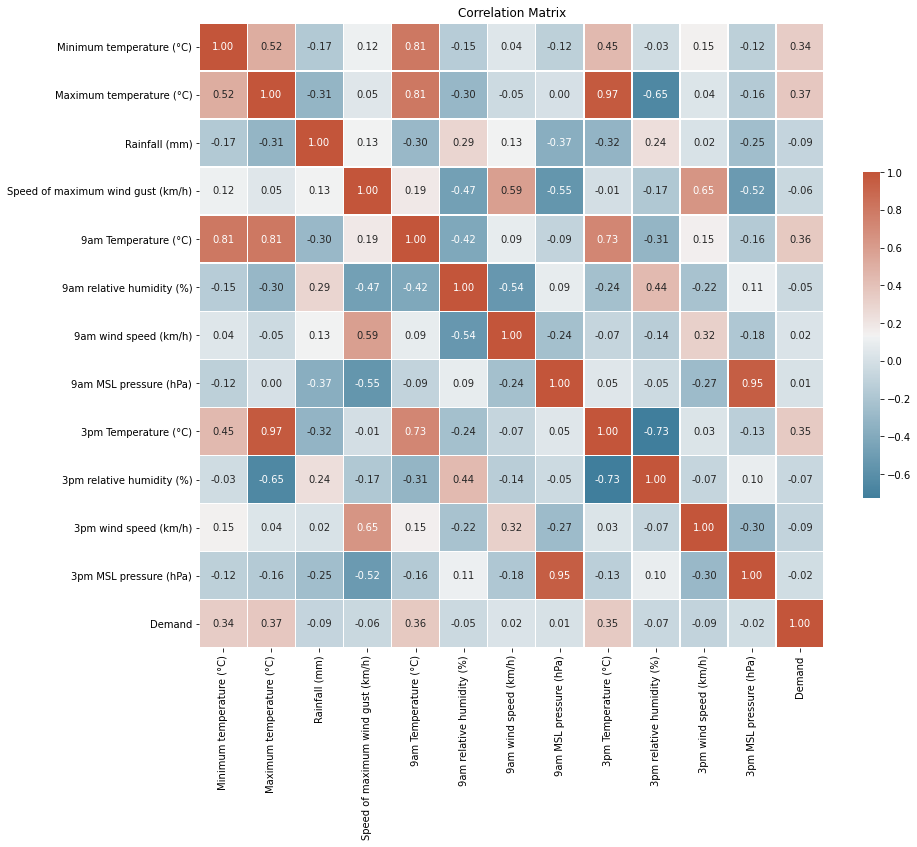

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' columns in both datasets are of the same type (string)
weather_demand_df['Date'] = weather_demand_df['Date'].astype(str)

# Define the columns for the correlation matrix
correlation_columns = [
    'Minimum temperature (°C)', 
    'Maximum temperature (°C)', 
    'Rainfall (mm)', 
    'Speed of maximum wind gust (km/h)', 
    '9am Temperature (°C)', 
    '9am relative humidity (%)', 
    '9am wind speed (km/h)', 
    '9am MSL pressure (hPa)', 
    '3pm Temperature (°C)', 
    '3pm relative humidity (%)', 
    '3pm wind speed (km/h)', 
    '3pm MSL pressure (hPa)', 
    'Demand'
]

# Compute the correlation matrix using the relevant columns
correlation_matrix_final = weather_demand_df[correlation_columns].corr()

# Set the figure size
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_final, cmap=cmap, annot=True, fmt=".2f", 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [54]:
#Relationship with Demand:

#Temperature: Both Maximum temperature (°C) and 3pm Temperature (°C) have a relatively strong positive correlation with Demand, suggesting that as the temperature rises, energy demand also tends to increase. This could be attributed to increased use of cooling appliances like air conditioners during hotter times.
#Rainfall: The Rainfall (mm) column has a slight negative correlation with Demand, indicating that on days with more rainfall, energy demand might be slightly lower. This could be because of cooler temperatures or reduced activity on rainy days.
#Wind: Speed of maximum wind gust (km/h) has a slight negative correlation with Demand, suggesting that when wind speeds are higher, the demand might decrease a bit. This could be due to increased wind energy generation or decreased heating needs.

In [55]:
#Relationship with Demand_price:

#Temperature: Just like with Demand, Demand_price also has a positive correlation with temperature, indicating that prices might go up with increasing temperatures, possibly due to increased demand.
#Rainfall & Wind: The correlations with Demand_price are similar to those with Demand, suggesting that weather conditions affect both demand and prices in similar ways.

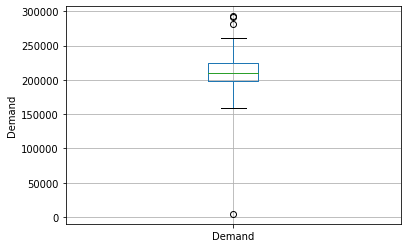

In [56]:
# Use Box plot to identify outliers in dependant "Demand"
daily_demand_df.boxplot(column='Demand')
plt.ylabel('Demand')
plt.show()

In [57]:
# Single point of outlier identified. Re-coded data_weather dataframe to drop that datapoint.

In [58]:
# Correlation is linear calculation, use scatterplots to visually confirm non-linear or linear relationship against Demand

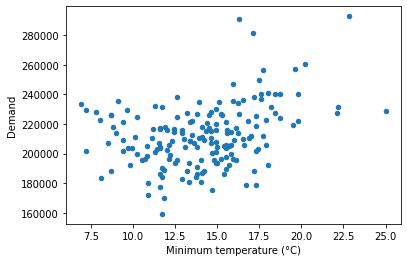

In [59]:
# Scatterplot 1a to visualise Demand vs Minimum Temperature
weather_demand_df.plot(x='Minimum temperature (°C)', y='Demand', kind='scatter')

plt.show()

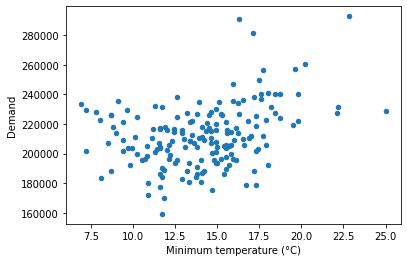

In [60]:
# Scatterplot 1 to visualise Demand vs Minimum Temperature
weather_demand_df.plot(x='Minimum temperature (°C)', y='Demand', kind='scatter')

plt.show()

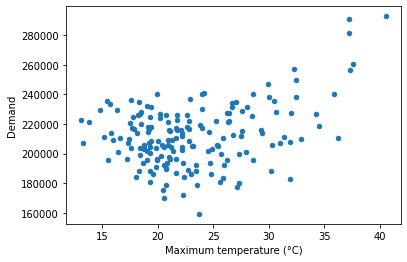

In [61]:
# Scatterplot 2 to visualise Demand vs Maximum Temperature
weather_demand_df.plot(x='Maximum temperature (°C)', y='Demand', kind='scatter')

plt.show()

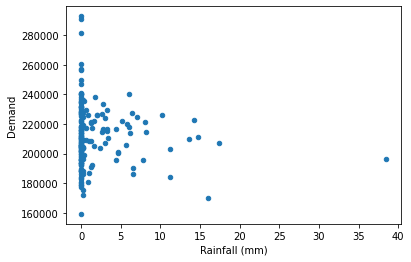

In [62]:
# Scatterplot 3 to visualise Demand vs Rainfall (mm)
weather_demand_df.plot(x='Rainfall (mm)', y='Demand', kind='scatter')

plt.show()

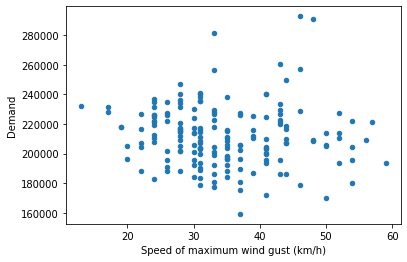

In [63]:
# Scatterplot 4 to visualise Demand vs Maximum wind gust
weather_demand_df.plot(x='Speed of maximum wind gust (km/h)', y='Demand', kind='scatter')

plt.show()

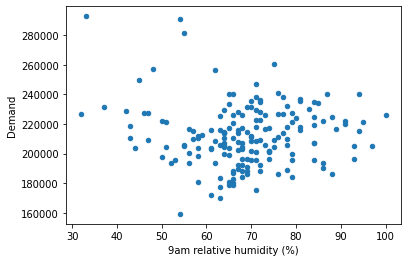

In [64]:
# Scatterplot 5 to visualise Demand vs Humidity (9am)
weather_demand_df.plot(x='9am relative humidity (%)', y='Demand', kind='scatter')

plt.show()

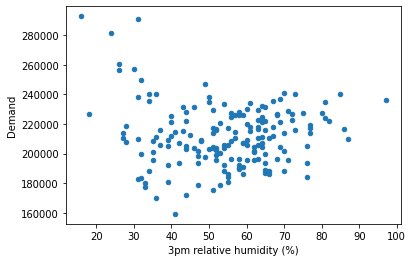

In [65]:
# Scatterplot 6 to visualise Demand vs Humidity (3pm)
weather_demand_df.plot(x='3pm relative humidity (%)', y='Demand', kind='scatter')

plt.show()

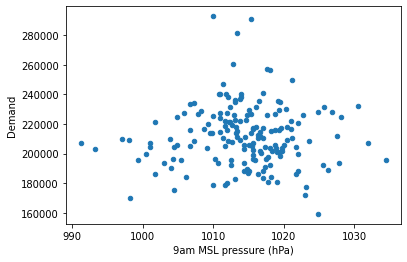

In [66]:
# Scatterplot 7 to visualise Demand vs Pressure (9am)
weather_demand_df.plot(x='9am MSL pressure (hPa)', y='Demand', kind='scatter')

plt.show()

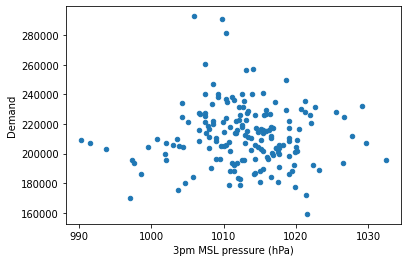

In [67]:
# Scatterplot 8 to visualise Demand vs Pressure (3pm)
weather_demand_df.plot(x='3pm MSL pressure (hPa)', y='Demand', kind='scatter')

plt.show()

In [68]:
# Add a new column 'Average_Temp_9am_3pm' which is the average of '9am Temperature (°C)' and '3pm Temperature (°C)'
weather_demand_df['Average_Temp_9am_3pm'] = weather_demand_df[['9am Temperature (°C)', '3pm Temperature (°C)']].mean(axis=1)

# Check the updated dataframe
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Average_Temp_9am_3pm
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46,12.60
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93,13.05
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34,12.65
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28,14.60
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35,16.40


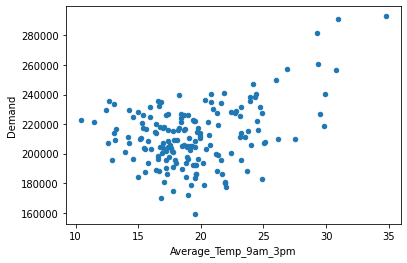

In [69]:
# Scatter plot for 'Average_Temp_9am_3pm' and 'Demand'
weather_demand_df.plot(x='Average_Temp_9am_3pm', y='Demand', kind='scatter')

plt.show()

In [70]:
# Calculate 24-hour moving average for 'Price'
data_price_demand['Price_MA_24'] = data_price_demand['Price'].rolling(window=24).mean()

# Check the dataframe
data_price_demand.head(30)

,Region,Timestamp,Demand,Price,Trade_Status,Price_MA_24
Date,,,,,,
2022-01-11,VIC1,2022-01-11 00:30:00,4178.18,8.94,TRADE,NaN
2022-01-11,VIC1,2022-01-11 01:00:00,4086.02,0.14,TRADE,NaN
2022-01-11,VIC1,2022-01-11 01:30:00,4033.37,0.02,TRADE,NaN
2022-01-11,VIC1,2022-01-11 02:00:00,3985.64,0.00,TRADE,NaN
2022-01-11,VIC1,2022-01-11 02:30:00,3885.64,0.02,TRADE,NaN
2022-01-11,VIC1,2022-01-11 03:00:00,3919.59,1.04,TRADE,NaN
2022-01-11,VIC1,2022-01-11 03:30:00,3806.64,0.12,TRADE,NaN
2022-01-11,VIC1,2022-01-11 04:00:00,3794.22,15.95,TRADE,NaN
2022-01-11,VIC1,2022-01-11 04:30:00,3772.77,0.02,TRADE,NaN


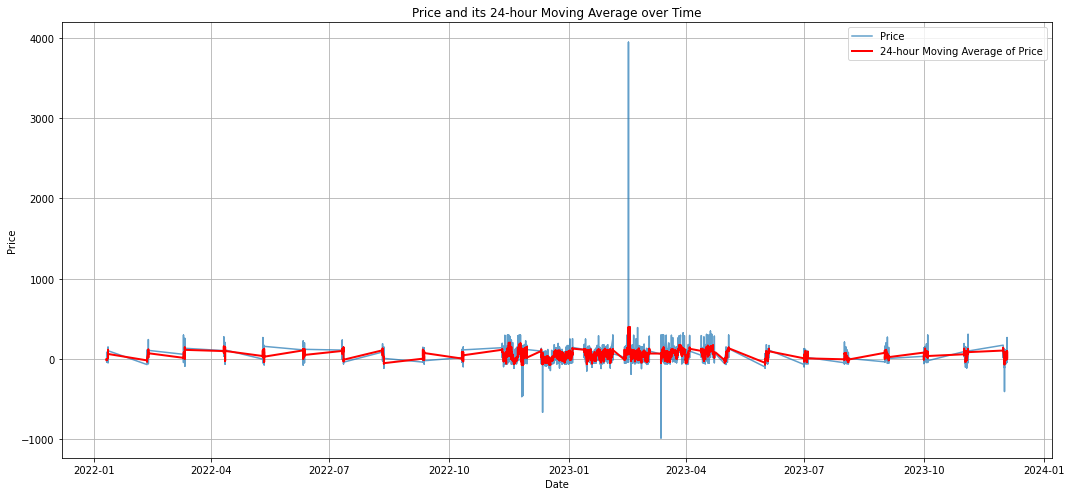

In [71]:
# Plotting the 'Price' and 'Price_MA_24' over time

plt.figure(figsize=(15, 7))
data_price_demand['Price'].plot(label='Price', alpha=0.7)
data_price_demand['Price_MA_24'].plot(label='24-hour Moving Average of Price', color='red', linewidth=2)
plt.title('Price and its 24-hour Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. FEATURE SELECTION

In [72]:
from scipy.stats import entropy
from sklearn.metrics import normalized_mutual_info_score
from scipy import stats

# Define the function to remove outliers
def remove_outliers(df, column_name, z_threshold=3):
    """
    Calculate z-scores for a column in the DataFrame and remove rows where the z-score
    of a value is greater than the z_threshold (indicating it is likely an outlier).
    
    Parameters:
    df: The DataFrame to process.
    column_name: The name of the column in df to check for outliers.
    z_threshold: The maximum z-score a value can have before it is removed.
    
    Returns:
    A new DataFrame with the outliers removed.
    """
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    cleaned_data = df[abs(z_scores) < z_threshold].copy()
    return cleaned_data

# Define the function to process each column
def process_column(df, column_name, demand_column_name):
    """
    Process a column in the DataFrame by:
    - Calculating its entropy and printing the result.
    - Removing outliers based on the z-score.
    - Discretizing the column into bins using the Freedman-Diaconis Rule.
    - Calculating and printing the Normalized Mutual Information (NMI) between the binned column and the demand.
    
    Parameters:
    df: The DataFrame to process.
    column_name: The name of the column in df to process.
    demand_column_name: The name of the column in df representing the demand.
    
    Returns:
    The DataFrame with the processed column.
    """
    # Calculate and print the entropy of the column
    entropy_value = entropy(df[column_name])
    print(f"Entropy of {column_name}: {entropy_value}")

    # Remove outliers in the column
    df = remove_outliers(df, column_name, z_threshold=3)

    # Calculate the bin size using the Freedman-Diaconis Rule
    iqr = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    bin_size = 2 * iqr / (len(df[column_name]) ** (1/3))

    # Calculate the number of bins and print the result
    data_min = df[column_name].min()
    data_max = df[column_name].max()
    num_bins = int((data_max - data_min) / bin_size)
    print(f"Number of {column_name} bins: {num_bins}")

    # Discretize the column into bins
    bin_column_name = f"{column_name}_bins"
    df.loc[:, bin_column_name] = pd.cut(df[column_name], bins=num_bins, labels=False)

    # Calculate and print the NMI between the binned column and the 'Demand' column
    nmi_value = normalized_mutual_info_score(df[bin_column_name], df[demand_column_name])
    print(f"NMI of {column_name} bins and {demand_column_name}: {nmi_value}\n")

    return df

# Call the function for each column
for column in ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)', 'Average_Temp_9am_3pm']:
    weather_demand_df = process_column(weather_demand_df, column, 'Demand')


Entropy of Minimum temperature (°C): 5.132601387690015
Number of Minimum temperature (°C) bins: 10
NMI of Minimum temperature (°C) bins and Demand: 0.5687809242099837

Entropy of Maximum temperature (°C): 5.127007338309079
Number of Maximum temperature (°C) bins: 9
NMI of Maximum temperature (°C) bins and Demand: 0.5555467912529726

Entropy of Rainfall (mm): 3.6405888560078714
Number of Rainfall (mm) bins: 34
NMI of Rainfall (mm) bins and Demand: 0.456797280694625

Entropy of Speed of maximum wind gust (km/h): 5.09591741709439
Number of Speed of maximum wind gust (km/h) bins: 9
NMI of Speed of maximum wind gust (km/h) bins and Demand: 0.5447693077064516

Entropy of 9am Temperature (°C): 5.111771654460453
Number of 9am Temperature (°C) bins: 12
NMI of 9am Temperature (°C) bins and Demand: 0.5939398021959328

Entropy of 9am relative humidity (%): 5.108976404550233
Number of 9am relative humidity (%) bins: 13
NMI of 9am relative humidity (%) bins and Demand: 0.61202075701973

Entropy of 9

In [73]:
# CHI SQUARED

In [74]:
from scipy.stats import chi2_contingency

# Binning the 'Demand' column
weather_demand_df['Demand_bins'] = pd.cut(weather_demand_df['Demand'], bins=14, labels=False)

# List of all the columns to test
columns_to_test = ['Minimum temperature (°C)_bins', 'Maximum temperature (°C)_bins', 'Rainfall (mm)_bins', 
                   'Speed of maximum wind gust (km/h)_bins', '9am Temperature (°C)_bins', '9am relative humidity (%)_bins', 
                   '9am wind speed (km/h)_bins', '9am MSL pressure (hPa)_bins', '3pm Temperature (°C)_bins', 
                   '3pm relative humidity (%)_bins', '3pm wind speed (km/h)_bins', '3pm MSL pressure (hPa)_bins', 
                   'Average_Temp_9am_3pm_bins']

# List to hold the pairs of variables and the p-values from the Chi-Squared test
p_values = []

# Iterate over each pair of columns
for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(weather_demand_df[column], weather_demand_df['Demand_bins'])

    # Perform the Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Add the pair of variables and the p-value to the list
    p_values.append((column, p))

# Create a DataFrame from the list of tuples
p_values_df = pd.DataFrame(p_values, columns=['Variable', 'p-value'])

# Sort the DataFrame in ascending order by the p-value
p_values_df = p_values_df.sort_values(by='p-value')

# Print the DataFrame
print(p_values_df)


                                  Variable       p-value
8                3pm Temperature (°C)_bins  8.779598e-07
1            Maximum temperature (°C)_bins  1.481597e-05
12               Average_Temp_9am_3pm_bins  3.946171e-05
4                9am Temperature (°C)_bins  5.208556e-05
6               9am wind speed (km/h)_bins  8.111511e-05
5           9am relative humidity (%)_bins  2.726066e-02
9           3pm relative humidity (%)_bins  9.552571e-02
10              3pm wind speed (km/h)_bins  1.464488e-01
0            Minimum temperature (°C)_bins  2.342036e-01
7              9am MSL pressure (hPa)_bins  5.037701e-01
3   Speed of maximum wind gust (km/h)_bins  8.039834e-01
11             3pm MSL pressure (hPa)_bins  8.668810e-01
2                       Rainfall (mm)_bins  9.999976e-01


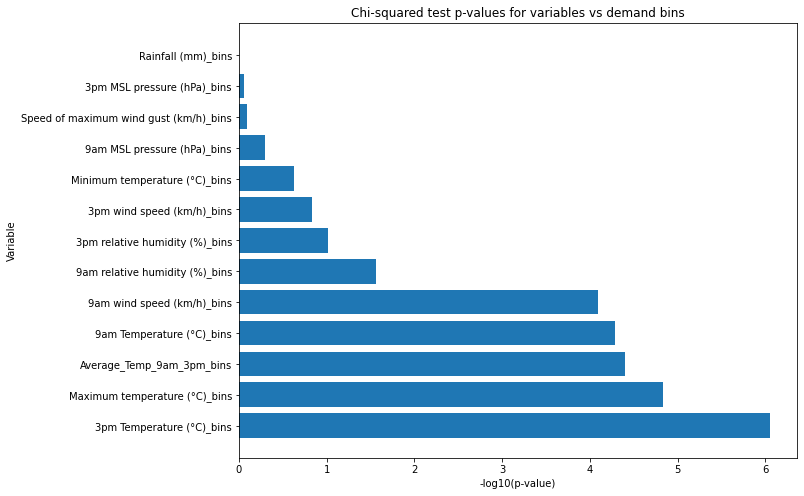

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Convert p-values to negative log10 (this is more intuitive - bigger bars mean more significant)
p_values_df['-log10(p-value)'] = -np.log10(p_values_df['p-value'])

# Plot the p-values
plt.figure(figsize=(10, 8))
plt.barh(p_values_df['Variable'], p_values_df['-log10(p-value)'])
plt.xlabel('-log10(p-value)')
plt.ylabel('Variable')
plt.title('Chi-squared test p-values for variables vs demand bins')
plt.show()

In [76]:
#Average temp, 3pm relative humidity more dependent

In [77]:
# Calculate 24-hour moving average for 'Demand'
weather_demand_df['Demand_MA_24'] = weather_demand_df['Demand'].rolling(window=24).mean()

# Check the dataframe
weather_demand_df.head(30)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),...,9am relative humidity (%)_bins,9am wind speed (km/h)_bins,9am MSL pressure (hPa)_bins,3pm Temperature (°C)_bins,3pm relative humidity (%)_bins,3pm wind speed (km/h)_bins,3pm MSL pressure (hPa)_bins,Average_Temp_9am_3pm_bins,Demand_bins,Demand_MA_24
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,...,5,6,3,1,3,7,4,1,8,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,...,6,6,8,1,5,4,8,1,8,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,...,9,4,11,2,3,4,10,2,7,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,...,8,6,10,3,5,6,9,3,3,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,...,5,6,9,6,1,1,8,6,2,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,...,5,2,9,4,5,4,8,5,5,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,...,4,10,7,6,2,2,6,7,6,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,...,6,8,8,7,1,7,6,8,6,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,...,2,11,6,6,2,12,5,8,7,NaN
10,2022-11-11,18.7,20.2,3.0,30.0,18.7,80,11,1011.0,18.2,...,8,7,5,3,7,8,4,4,7,NaN


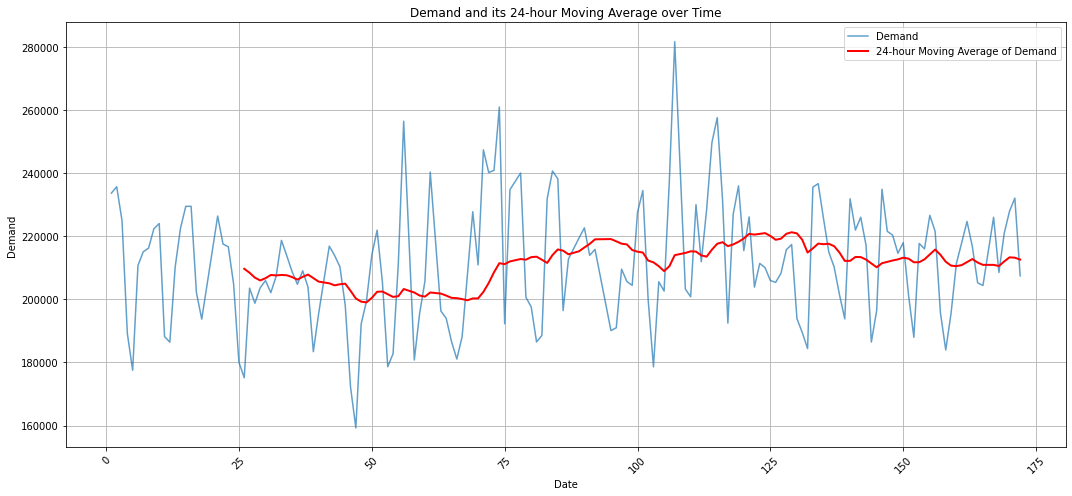

In [78]:
# Line graph for 'Demand_MA_24' over time
# Line graph for 'Demand' and 'Demand_MA_24' over time

plt.figure(figsize=(15, 7))
weather_demand_df['Demand'].plot(label='Demand', alpha=0.7)
weather_demand_df['Demand_MA_24'].plot(label='24-hour Moving Average of Demand', color='red', linewidth=2)
plt.title('Demand and its 24-hour Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# Calculate average temperature from 9am to 3pm for each row
weather_demand_df['Avg_Temp_9_to_3'] = (weather_demand_df['9am Temperature (°C)'] + weather_demand_df['3pm Temperature (°C)']) / 2

# Calculate 24-hour moving average for 'Avg_Temp_9_to_3'
weather_demand_df['Avg_Temp_MA_24'] = weather_demand_df['Avg_Temp_9_to_3'].rolling(window=24).mean()

# Display the first 30 rows of the dataframe
weather_demand_df.head(30)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),...,9am MSL pressure (hPa)_bins,3pm Temperature (°C)_bins,3pm relative humidity (%)_bins,3pm wind speed (km/h)_bins,3pm MSL pressure (hPa)_bins,Average_Temp_9am_3pm_bins,Demand_bins,Demand_MA_24,Avg_Temp_9_to_3,Avg_Temp_MA_24
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,...,3,1,3,7,4,1,8,NaN,13.05,NaN
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,...,8,1,5,4,8,1,8,NaN,12.65,NaN
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,...,11,2,3,4,10,2,7,NaN,14.60,NaN
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,...,10,3,5,6,9,3,3,NaN,16.40,NaN
5,2022-11-06,11.6,27.1,0.0,33.0,17.9,63,9,1023.2,26.2,...,9,6,1,1,8,6,2,NaN,22.05,NaN
6,2022-11-07,13.9,25.9,0.0,24.0,19.7,64,4,1021.1,20.2,...,9,4,5,4,8,5,5,NaN,19.95,NaN
7,2022-11-08,14.6,27.6,0.0,35.0,21.8,57,15,1018.2,25.8,...,7,6,2,2,6,7,6,NaN,23.80,NaN
8,2022-11-09,15.6,29.3,2.8,35.0,20.8,67,13,1018.8,28.3,...,8,7,1,7,6,8,6,NaN,24.55,NaN
9,2022-11-10,19.8,26.4,0.0,54.0,23.8,50,17,1013.8,25.1,...,6,6,2,12,5,8,7,NaN,24.45,NaN
10,2022-11-11,18.7,20.2,3.0,30.0,18.7,80,11,1011.0,18.2,...,5,3,7,8,4,4,7,NaN,18.45,NaN


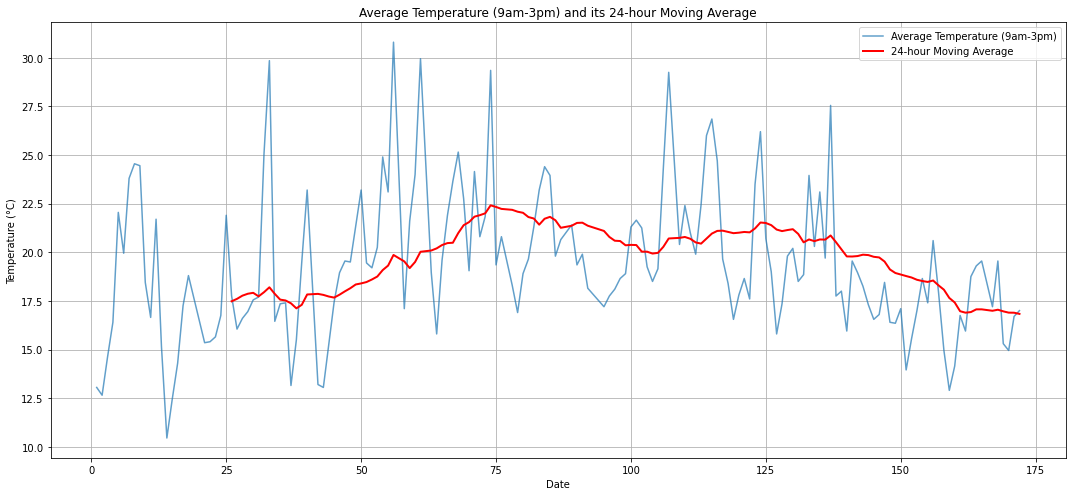

In [80]:
import matplotlib.pyplot as plt

# Plotting the moving average of the average temperature from 9am to 3pm

plt.figure(figsize=(15, 7))
weather_demand_df['Avg_Temp_9_to_3'].plot(label='Average Temperature (9am-3pm)', alpha=0.7)
weather_demand_df['Avg_Temp_MA_24'].plot(label='24-hour Moving Average', color='red', linewidth=2)
plt.title('Average Temperature (9am-3pm) and its 24-hour Moving Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. PREDICTIVE ANALYTICS ##

In [81]:
## LINEAR REGRESSION ##

In [82]:
#linear regression '9am Temperature (°C)' and 'Demand'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('9am Temperature (°C)') and the target variable ('Demand')
X = weather_demand_df[['9am Temperature (°C)']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

(396574265.3067585, -0.048959149745248176)

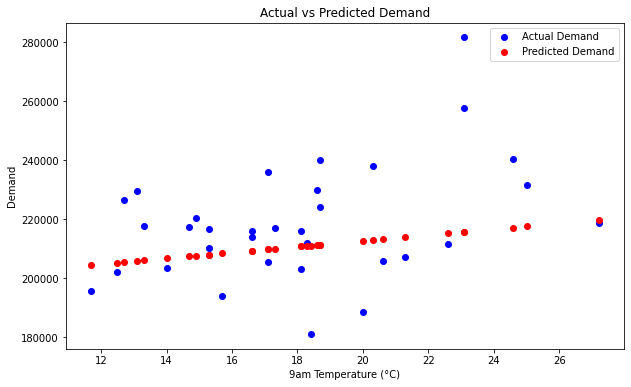

In [83]:
# Scatter plot of the test data and the predicted demand
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Demand')
plt.scatter(X_test, y_pred, color='red', label='Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.xlabel('9am Temperature (°C)')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [84]:
# The R-squared statistic is approximately -0.0338. The R-squared statistic provides a measure of how well future samples are likely to be predicted by the model. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of 'Demand', disregarding the input features, would get a R-squared score of 0.0.
# In this context, a negative R-squared value indicates that the model is performing worse than a model that always predicts the average demand, regardless of the 9am temperature. This suggests that the 9am temperature alone is not a good predictor of demand, at least not with a linear model.

In [85]:
#linear regression with 4 week moving average of average temp as the predictor variable and 4 week moving average of demand variable as the target variable.

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('Avg_Temp_9am_3pm_MA_4week') and the target variable ('Demand_MA_4week')
X = weather_demand_df[['Avg_Temp_9am_3pm_MA_4week']]
y = weather_demand_df['Demand_MA_4week']

# Drop rows with NaN values
X = X.dropna()
y = y.dropna()

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

KeyError: "None of [Index(['Avg_Temp_9am_3pm_MA_4week'], dtype='object')] are in the [columns]"

In [ ]:
# Scatter plot of the test data and the predicted demand
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Demand')
plt.scatter(X_test, y_pred, color='red', label='Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.xlabel('4-Week Moving Average of Average Temperature at 9am and 3pm (°C)')
plt.ylabel('4-Week Moving Average of Demand')
plt.legend()
plt.show()

In [ ]:
#The The R² of 0.5056 suggests a moderate correlation between demand and the average temperature at 9 am and 3 pm
#However, there is still quite a bit of spread in the points, indicating that there is variation in demand that isn't fully explained by the average temperature. 

In [ ]:
#linear regression with 9am relative humidity as the predictor variable and demand as the target variable.

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('9am relative humidity (%)') and the target variable ('Demand')
X = weather_demand_df[['9am relative humidity (%)']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# Scatter plot of the test data and the predicted demand
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Demand')
plt.scatter(X_test, y_pred, color='red', label='Predicted Demand')
plt.title('Actual vs Predicted Demand')
plt.xlabel('9am Relative Humidity (%)')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [ ]:
# -0.05508703858874098 suggests that using '9am relative humidity' as a predictor for 'Demand' in a simple Linear Regression model does not provide a good fit

In [ ]:
# the model is performing worse than a model that always predicts the average demand, regardless of the 3pm relative humidity. This suggests that the 3pm relative humidity alone is not a good predictor of demand, at least not with a linear model.

In [ ]:
#decision tree 9 am temperature and demand

from sklearn.tree import DecisionTreeRegressor

# Define the predictor variable ('9am Temperature (°C)') and the target variable ('Demand')
X = weather_demand_df[['9am Temperature (°C)']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# a negative R-squared value indicates that the model is performing much worse than a model that always predicts the average demand, regardless of the 9am temperature. This suggests that the 9am temperature alone is not a good predictor of demand, at least not with a decision tree model.

In [ ]:
## DECISION TREE

In [ ]:
# decision tree Average temp and Demand
# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# a negative R-squared value of -0.3660241502516619 indicates that the model is performing much worse than a model that always predicts the average demand, regardless of the 9am relative humidity. This suggests that the 9am relative humidity alone is not a good predictor of demand, at least not with a decision tree model.

In [ ]:
## RANDOM FOREST

In [ ]:
#random forest avg temp vs demand

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# A negative R-squared value of 0.026736324213305185 quite low, suggesting that the model does not explain much of the variability in the 'Demand'

In [ ]:
 # a negative R-squared value of -0.35053521766526563 indicates that the model is performing worse than a model that always predicts the average demand, regardless of the 9am relative humidity. 

In [ ]:
#KNN NEAREST NEIGHBOUR

In [ ]:
#knn avg temp vs demand

from sklearn.neighbors import KNeighborsRegressor

# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# 0.02544469057553367 is quite low, suggesting that the model does not explain much of the variability in the 'Demand'.

In [ ]:
## POLYNOMIAL REGRESSION

In [ ]:
#Polynomial Regression average temperature vs demand

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Define the predictor variable ('Average_Temp_9am_3pm') and the target variable ('Demand')
X = weather_demand_df[['Average_Temp_9am_3pm']]
y = weather_demand_df['Demand']

# Transform the predictor variable to a polynomial of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# 0.1833794519704104 is low, suggesting that the model does not explain much of the variability in the 'Demand'.

In [ ]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)